In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
heart_df=pd.read_csv(r"C:\Users\Ankit\Desktop\MediSense\Datasets\Structured\Heart_Disease.csv")

In [ ]:
heart_df.head(5)

,age,sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,MAX HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart_df.columns = heart_df.columns.str.strip()


In [ ]:
heart_df.shape

(1025, 14)

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   Chest pain type          1025 non-null   int64  
 3   BP                       1025 non-null   int64  
 4   Cholesterol              1025 non-null   int64  
 5   FBS over 120             1025 non-null   int64  
 6   EKG results              1025 non-null   int64  
 7   MAX HR                   1025 non-null   int64  
 8   Exercise angina          1025 non-null   int64  
 9   ST depression            1025 non-null   float64
 10  Slope of ST              1025 non-null   int64  
 11  Number of vessels fluro  1025 non-null   int64  
 12  Thallium                 1025 non-null   int64  
 13  Heart Disease            1025 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
heart_df['Thallium'].value_counts()

Thallium
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [ ]:
'''The value `0` in the `thallium` column is treated as missing data in our dataset therefore we are replacing 0 with the mod value of thallium'''
thallium_mode = heart_df.loc[heart_df['Thallium'] != 0, 'Thallium'].mode()[0]
heart_df['Thallium'] = heart_df['Thallium'].replace(0, thallium_mode)


## Exploratory Data Analysis

In [ ]:
heart_df.head(2)

,age,sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,MAX HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


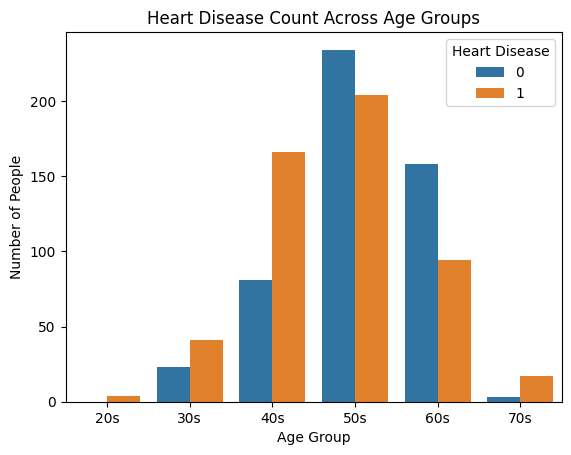

In [ ]:
heart_df['age_group'] = pd.cut(heart_df['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20s','30s','40s','50s','60s','70s'])

# Plot
sns.countplot(x='age_group', hue='Heart Disease', data=heart_df)
plt.title("Heart Disease Count Across Age Groups")
plt.ylabel("Number of People")
plt.xlabel("Age Group")
plt.show()
heart_df.drop('age_group', axis=1, inplace=True)

"Most heart disease cases are seen in people in their 50s, but this age group also has many people without the disease — showing it's a common age range, not just a risky one."

<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

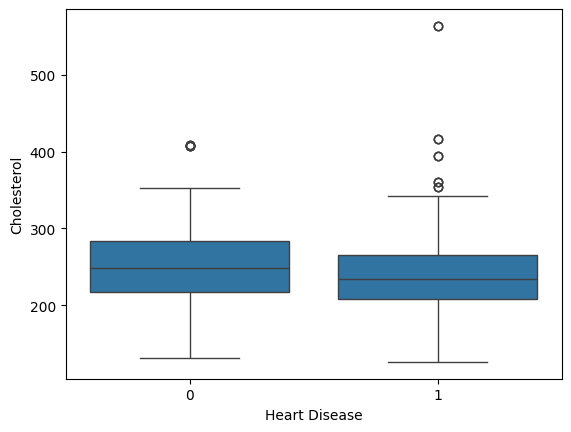

In [ ]:
sns.boxplot(x='Heart Disease', y='Cholesterol', data=heart_df)


"People with and without heart disease have similar cholesterol levels, suggesting cholesterol alone may not be a strong indicator of heart disease in this dataset."

<Axes: xlabel='Chest pain type', ylabel='count'>

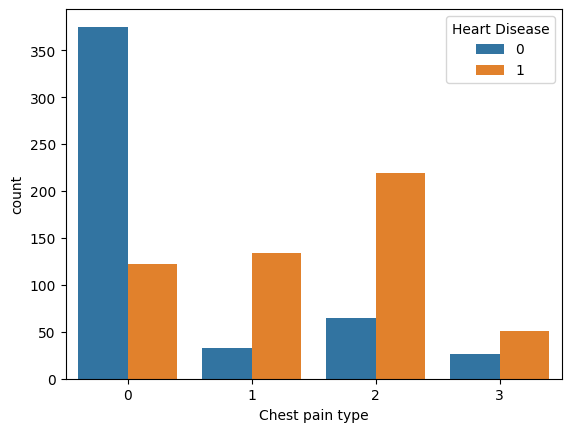

In [ ]:
sns.countplot(x='Chest pain type', hue='Heart Disease', data=heart_df)

"Chest pain type 2 refers to non-anginal pain, which means the pain is not typically related to the heart, However, in this data, it’s often seen in people who do have heart disease, suggesting that even this kind of chest pain might still be a warning sign."

<Axes: xlabel='FBS over 120', ylabel='count'>

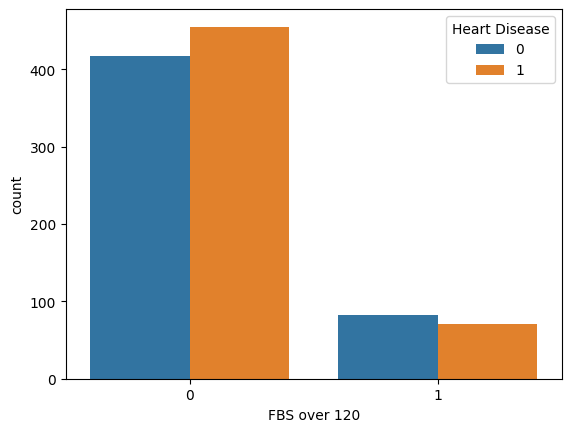

In [ ]:
sns.countplot(x='FBS over 120', hue='Heart Disease', data=heart_df)


"Having fasting blood sugar > 120 is not strongly associated with a higher risk of heart disease in this dataset.
In fact, people with normal FBS (≤120) still show a high number of heart disease cases, likely because other features (e.g., age, cholesterol, etc.) play a larger role."

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(heart_df['FBS over 120'], heart_df['Heart Disease'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Print the results
print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)
print("P-value:", p)

# Step 4: Interpret the result
alpha = 0.05
if p < alpha:
    print("\nConclusion: Reject the null hypothesis — there IS a significant association between FBS over 120 and Heart Disease.")
else:
    print("\nConclusion: Fail to reject the null hypothesis — NO significant association between FBS over 120 and Heart Disease.")


Contingency Table:
Heart Disease    0    1
FBS over 120           
0              417  455
1               82   71

Chi-Square Statistic: 1.5133794801852827
Degrees of Freedom: 1
Expected Frequencies:
 [[424.51512195 447.48487805]
 [ 74.48487805  78.51512195]]
P-value: 0.21862413102893974

Conclusion: Fail to reject the null hypothesis — NO significant association between FBS over 120 and Heart Disease.


"There is no statistically significant association between having Fasting Blood Sugar > 120 and the presence of Heart Disease in your dataset.Therefore we can drop this feature"

In [ ]:
heart_df.drop('FBS over 120',axis=1,inplace=True)

#### Check Correlation between features

In [ ]:
num_datasets=heart_df[[column for column in heart_df.columns if heart_df[column].nunique()>5]]

<Axes: >

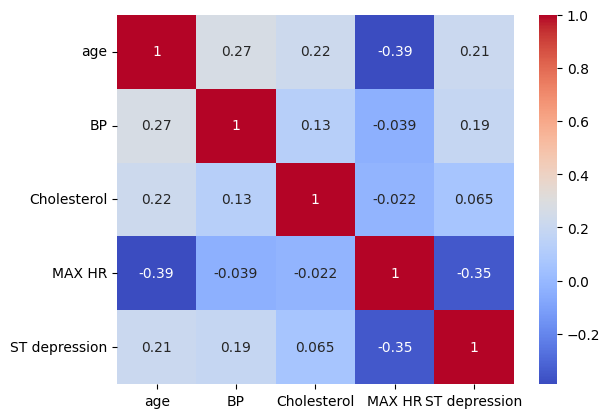

In [ ]:
heart_df_corr=num_datasets.corr()
sns.heatmap(heart_df_corr,annot=True,cmap='coolwarm')

''' All features are independent to each others'''

## Pre-Processing

#### outlier detection

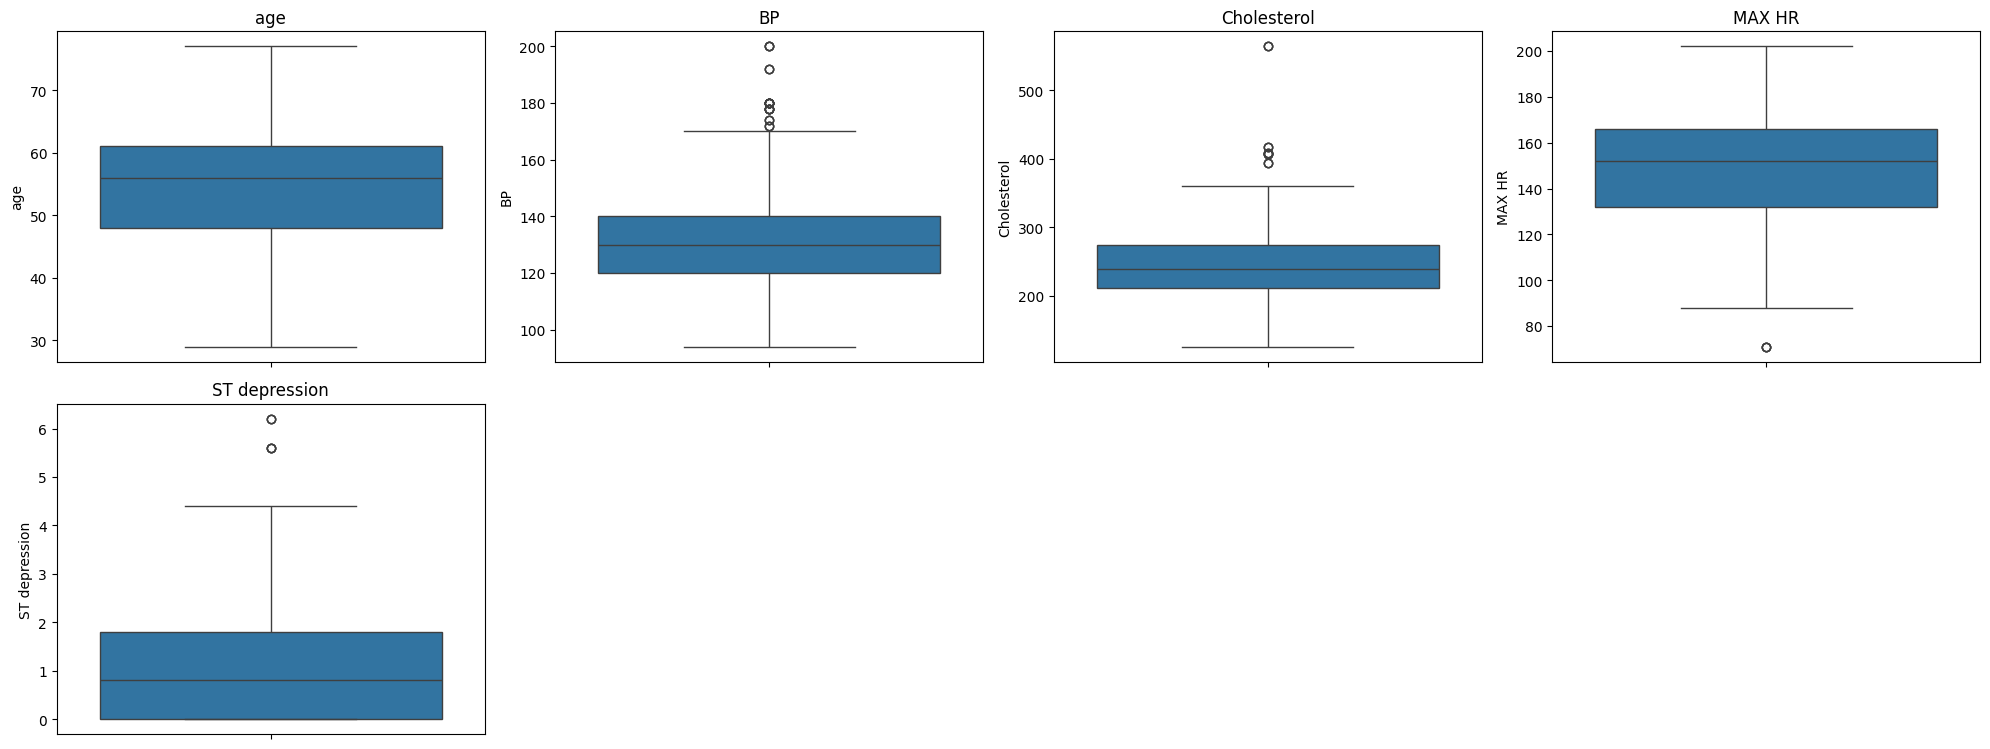

In [ ]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(num_datasets):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=num_datasets[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers_iqr(df, features):
    outlier_rows = pd.DataFrame()
    
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        # Append to final outliers dataframe
        outlier_rows = pd.concat([outlier_rows, feature_outliers])
    
    outlier_rows = outlier_rows.drop_duplicates()
    
    print(f"Total unique outlier records found across selected features: {len(outlier_rows)}")
    return outlier_rows


In [ ]:
detect_outliers_iqr(heart_df,['ST depression','Cholesterol','BP'])

Total unique outlier records found across selected features: 16


,age,sex,Chest pain type,BP,Cholesterol,EKG results,MAX HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
54,55,1,0,140,217,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,145,0,6.2,0,3,3,0
123,65,0,2,140,417,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,154,0,4.0,1,3,3,0
29,55,0,0,180,327,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,1,143,1,0.0,1,0,2,0


''' Almost all detected outliers appear to be valid medical observations rather than data entry errors, and thus, they should be retained for further analysis '''

In [ ]:
'''Scaling numerical features for supoort vector classfier model'''

num_columns=[0,3,4,6,8]
svm_preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_columns),
],remainder='passthrough')

#### Encoding Categorical Features


In [ ]:
heart_df.head(2)

,age,sex,Chest pain type,BP,Cholesterol,EKG results,MAX HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,52,1,0,125,212,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,0,155,1,3.1,0,0,3,0


In [ ]:
cat_columns=[2,5,7,9,10,11]

In [ ]:
trf1=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(handle_unknown='ignore',drop='first'),cat_columns),
],remainder='passthrough')

## Model Training


In [ ]:
'''Separating features and label'''
X=heart_df.drop(['Heart Disease'],axis=1)
Y=heart_df.iloc[:,-1]

In [ ]:
# Split the dataset into training and testing sets (e.g., 75% training, 25% testing)'''
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=11)

#### Defining Pipeline

In [ ]:
# Random Forest Pipeline with Regularization
rf_pipeline = Pipeline([
    ('trf1', trf1),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42
    ))
])

# SVM Pipeline with Regularization
svm_pipeline = Pipeline(steps=[
    ('preprocessor', svm_preprocessor),
    ('svm_classifier', SVC(
        C=0.5,                # lower C = stronger regularization
        kernel='rbf',
        probability=True
    ))
])

#  XGBoost Pipeline with Regularization
xgb_pipeline = Pipeline(steps=[
    ('xgb_classifier', XGBClassifier(
        eval_metric='logloss',
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,    # L1 regularization
        reg_lambda=1.0    # L2 regularization
    ))
])


In [ ]:
svm_pipeline.fit(X_train, y_train) 
rf_pipeline.fit(X_train, y_train)   
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('xgb_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

#### Ensemble Learning

In [ ]:
# Define base learners
base_learners = [
    ('rf', rf_pipeline),
    ('svm', svm_pipeline),
    ('xgb', xgb_pipeline)
]

# Meta-learner
meta_learner = LogisticRegression()

# Stacking Classifier
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=False  # if True, passes original features too to meta-learner
)


In [ ]:
stacked_model.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                Pipeline(steps=[('trf1',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('ohe',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  [2,
                                                                                   5,
                                                                                   7,
                                                                                   9,
                                                                                   10,
                                                                                   11])])),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=5,
                                                                        min_samples_leaf=5,
                                                                        min_samples_split=10,
                                                                        random_state=42))])),
                               ('svm',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTr...
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=0.1,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=3,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None, ...))]))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
train_pred = stacked_model.predict(X_train)
test_pred = stacked_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.96875
Testing Accuracy: 0.9416342412451362


## HyperParamteter Tuning

#### Random Forest

In [ ]:
RC_params={
    'n_estimators':[50,75,100,150],
    'max_depth':[2,3,4,5],
    'min_samples_leaf':[10,15,20],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
}

In [ ]:
# RandomizedSearchCV
random_search_model = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=126), 
    param_distributions=RC_params, 
    n_iter=50,
    scoring='accuracy',
    cv=10,
    verbose=2,
    random_state=48,
    n_jobs=-1 
)

In [ ]:
random_search_model.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=126),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [10, 15, 20],
                                        'n_estimators': [50, 75, 100, 150]},
                   random_state=48, scoring='accuracy', verbose=2)

In [ ]:
RC_best=random_search_model.best_estimator_

In [ ]:
print(RC_best)

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=10,
                       n_estimators=75, random_state=126)


In [ ]:
RC_score=accuracy_score(y_test,RC_best.predict(X_test))

In [ ]:
print(RC_score)

0.8988326848249028


In [ ]:
feature_importance = random_search_model.best_estimator_.feature_importances_


importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
2,Chest pain type,0.226986
11,Thallium,0.184509
10,Number of vessels fluro,0.141782
6,MAX HR,0.110326
8,ST depression,0.086162
0,age,0.065732
7,Exercise angina,0.051560
9,Slope of ST,0.035961
1,sex,0.033628
4,Cholesterol,0.026569


#### 2. SVM – RandomizedSearchCV

In [ ]:
svm_params = {
    'svm_classifier__C': np.logspace(-3, 2, 6),  
    'svm_classifier__kernel': ['linear', 'rbf', 'poly'],
    'svm_classifier__gamma': ['scale', 'auto'],
    'svm_classifier__degree': [2, 3, 4],              
    'svm_classifier__probability': [True]             
}

svm_random = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=svm_params,
    n_iter=10,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

svm_random.fit(X_train, y_train)
svm_best=svm_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


#### 3. XGBoost – RandomizedSearchCV

In [ ]:
xgb_params = {
    'xgb_classifier__n_estimators': [50,75,100],
    'xgb_classifier__max_depth': [2,3, 4, 5],
    'xgb_classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb_classifier__subsample': [0.6, 0.8, 1.0],
    'xgb_classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_params,
    n_iter=15,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train, y_train)
xgb_best=xgb_random.best_estimator_


Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
best_rf_pipeline = Pipeline([
    ('preprocessor', rf_pipeline.named_steps['trf1']), 
    ('rf', RC_best)  
])

best_svm_pipeline = Pipeline([
    ('preprocessor', svm_pipeline.named_steps['preprocessor']),
    ('svm', svm_best)
])

best_rf_pipeline.fit(X_train, y_train)
best_svm_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train) 

base_learners = [
    ('rf', best_rf_pipeline),
    ('svm', best_svm_pipeline),
    ('xgb', xgb_pipeline)
]

# Meta-learner
meta_learner = LogisticRegression(
    penalty='l2',    
    C=0.1,               
    solver='lbfgs',      
    max_iter=1000,
    random_state=42
)

# Stacking Classifier
stacked_model_tuned = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

stacked_model_tuned.fit(X_train, y_train)
stacked_model_tuned_pred = stacked_model_tuned.predict(X_test)


In [ ]:
accuracy_score(y_test,stacked_model_tuned_pred)

0.980544747081712

In [ ]:
# Cross-validation score
cv_score = cross_val_score(stacked_model_tuned, X, Y, cv=5, scoring='accuracy')
print("Stacked Model Accuracy after cross validation:", cv_score.mean())

Stacked Model Accuracy after cross validation: 0.9678048780487805


"After hyperparameter tuning, the stacked model's accuracy improved from 94.16% (before tuning) to 96.78%, indicating better generalization and predictive performance."

 <!-- ## "Evaluating Model Performance Using ROC-AUC and Classification Metrics" -->

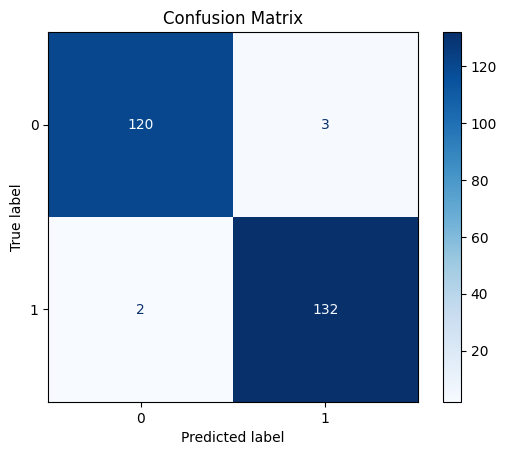

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Confusion matrix
cm = confusion_matrix(y_test,stacked_model_tuned_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacked_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


"The model is highly accurate, correctly predicting most cases. It only misclassifies 2 positive and 3 negative cases, showing a good balance and generalization."

ROC AUC Score: 0.9936


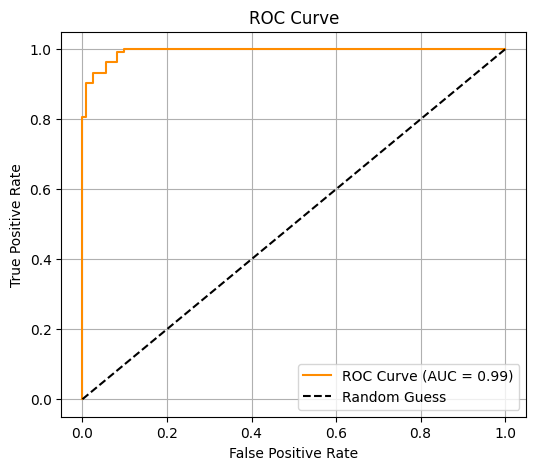

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for positive class
rf_probs = stacked_model.predict_proba(X_test)[:, 1]

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics
accuracy = accuracy_score(y_test, stacked_model_tuned_pred)
precision = precision_score(y_test, stacked_model_tuned_pred)
recall = recall_score(y_test, stacked_model_tuned_pred)
f1 = f1_score(y_test, stacked_model_tuned_pred)

# Print
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9805
Precision: 0.9778
Recall: 0.9851
F1 Score: 0.9814


In [ ]:
import pickle

# Save the pipeline (including preprocessing and model)
with open("Heart_Disease_model.pkl", "wb") as f:
    pickle.dump(stacked_model_tuned, f)


In [ ]:
input_data = {
    'age': [78],
    'sex': [0],
    'Chest pain type': [3],
    'BP': [140],
    'Cholesterol': [230],
    'EKG results': [0],
    'MAX HR': [150],
    'Exercise angina': [1],
    'ST depression': [1.5],
    'Slope of ST': [0],
    'Number of vessels fluro': [1],
    'Thallium': [2]
}

input_df = pd.DataFrame(input_data)

prediction = stacked_model_tuned.predict(input_df)[0]

probabilities = stacked_model_tuned.predict_proba(input_df)[0]

class_labels = stacked_model_tuned.classes_

prob_dict = dict(zip(class_labels, probabilities))

print(f"Prediction: {prediction}")
print("Probabilities for each class:")
for cls, prob in prob_dict.items():
    print(f"Class {cls}: {prob:.4f}")


Prediction: 1
Probabilities for each class:
Class 0: 0.1767
Class 1: 0.8233
